In [92]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
df = pd.read_csv('COVID-19_in_bd-2020 (1).csv')
df

,Date,Confirmed,Deaths,Recovered
0,3/8/2020,3,0,0
1,3/9/2020,3,0,0
2,3/10/2020,3,0,0
3,3/11/2020,3,0,0
4,3/12/2020,3,0,0
5,3/13/2020,3,0,0
6,3/14/2020,3,0,0
7,3/15/2020,5,0,0
8,3/16/2020,8,0,0
9,3/17/2020,10,0,0


In [94]:
df.head()

,Date,Confirmed,Deaths,Recovered
0,3/8/2020,3,0,0
1,3/9/2020,3,0,0
2,3/10/2020,3,0,0
3,3/11/2020,3,0,0
4,3/12/2020,3,0,0


In [95]:
df.tail()

,Date,Confirmed,Deaths,Recovered
32,4/9/2020,333,21,33
33,4/10/2020,424,27,33
34,4/11/2020,482,30,36
35,4/12/2020,621,34,39
36,4/13/2020,803,39,42


In [96]:
df.shape

(37, 4)

In [97]:
df.corr()

,Confirmed,Deaths,Recovered
Confirmed,1.000000,0.970785,0.740333
Deaths,0.970785,1.000000,0.850898
Recovered,0.740333,0.850898,1.000000


In [98]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

# Explore Data

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       37 non-null     object
 1   Confirmed  37 non-null     int64 
 2   Deaths     37 non-null     int64 
 3   Recovered  37 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.3+ KB


In [100]:
df.columns

Index(['Date', 'Confirmed', 'Deaths', 'Recovered'], dtype='object')

# Check Null Values

In [101]:
df.isna().sum()

Date         0
Confirmed    0
Deaths       0
Recovered    0
dtype: int64

In [102]:
# showing number of unique value for every column
df.nunique()

Date         37
Confirmed    28
Deaths       16
Recovered    14
dtype: int64

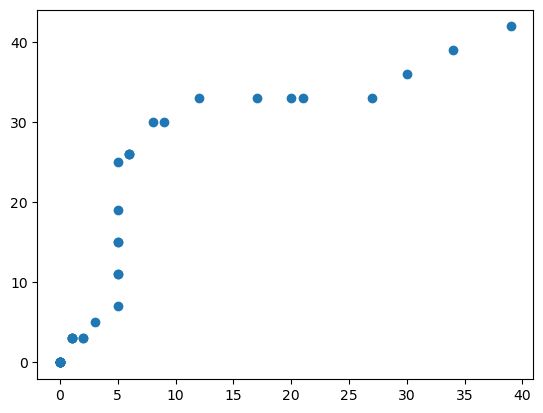

In [103]:
ax = plt.axes() 
ax.scatter(df["Deaths"],df["Recovered"])


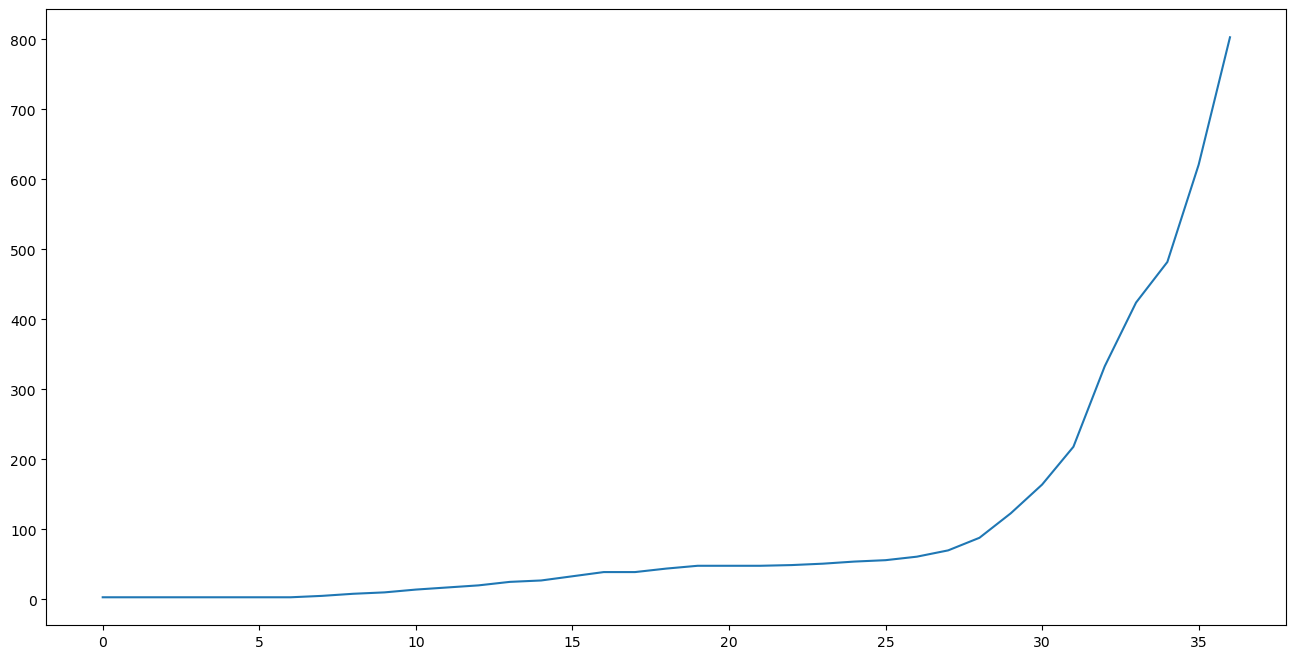

In [104]:
plt.figure(figsize=(16,8))
plt.plot(df['Confirmed'], label='Confirmed cases');

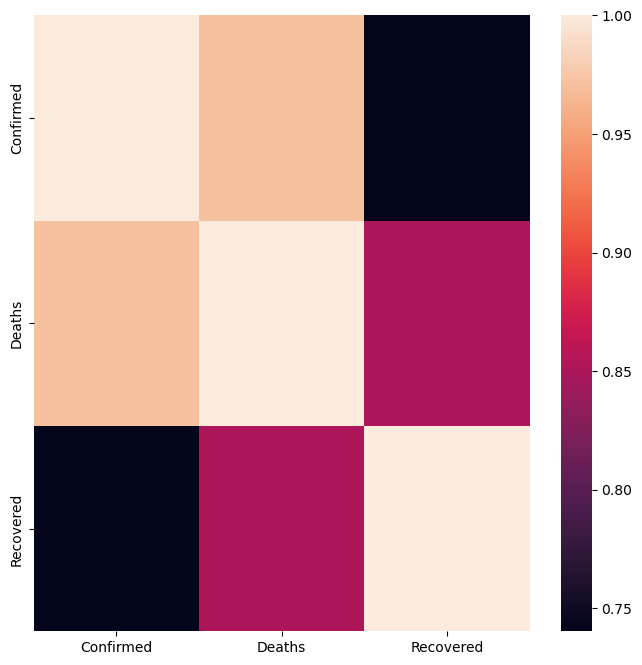

In [105]:
import seaborn as sns     
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.corr());

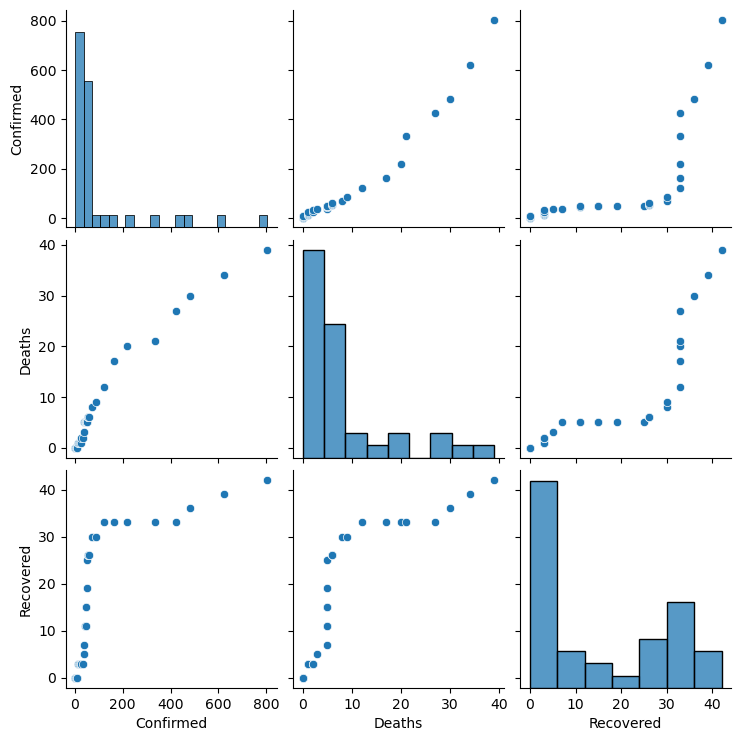

In [106]:
sns.pairplot(df);

In [109]:
df=df.filter(['Confirmed','Deaths','Recovered'])
df["Confirmed"]=pd.to_numeric(df["Confirmed"])
df["Recovered"]=pd.to_numeric(df["Recovered"])
df["Deaths"]=pd.to_numeric(df["Deaths"])

In [110]:
x = df.drop('Deaths',axis=1)
y = df[['Deaths']]

In [111]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split, cross_val_score 
GNB = GaussianNB()
nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      'multinomial': MultinomialNB()}
scores = {}

for key, model in nb.items():
    s = cross_val_score(model, x, y, cv=5, n_jobs=10, scoring='accuracy')
    scores[key] = np.mean(s)
scores

C:\Users\personal\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\personal\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\personal\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'gaussian': 0.6214285714285713,
 'bernoulli': 0.46428571428571425,
 'multinomial': 0.49642857142857144}

In [115]:
from sklearn.linear_model import LinearRegression
dataframe = df.dropna(how='any',axis=0)
X_egitim, X_test, y_egitim, y_test = train_test_split(x, y, test_size=0.2, random_state=135)
lr = LinearRegression()
r_fit = lr.fit(X_egitim, y_egitim)

y_pred = lr.predict(X_test)
r_fit.score(X_test, y_test)*100

97.58608915296404

In [117]:
from sklearn.tree import DecisionTreeClassifier
X_egitim, X_test, y_egitim, y_test = train_test_split(x,y, random_state=135)
agac = DecisionTreeClassifier(random_state=135,min_samples_split=2)
agac.fit(X_egitim, y_egitim)
agac.score(x, y)

0.8648648648648649

In [127]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_egitim, y_egitim)

prediction = lr.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.00      0.00      0.00         1
           5       0.25      1.00      0.40         1
           6       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         0
          39       0.00      0.00      0.00         0

    accuracy                           0.40        10
   macro avg       0.11      0.19      0.13        10
weighted avg       0.33      0.40      0.34        10



C:\Users\personal\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\personal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\personal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zer

In [123]:
from sklearn.linear_model import LogisticRegression

In [124]:

# Create a Logistic Regression model
lg = LogisticRegression()

# Train the model on the training data
lg.fit(xtrain, ytrain)

# Calculate the accuracy score on the test data
test_score = lg.score(xtest, ytest)
print("Testing Score:", test_score)
# Calculate the accuracy score on the training data
train_score = lg.score(xtrain, ytrain)
print("Training Score:", train_score)

Testing Score: 0.2
Training Score: 0.7407407407407407


C:\Users\personal\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\personal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [129]:
pplt.figure(figsize=(10, 10))
plt.plot(df.Date.index, df.Deaths, color='blue')
plt.plot(df.Date.index, df.Recovered, color='green')
plt.legend(['Ölümler', 'Kurtulanlar'], loc='best' , fontsize=20)
plt.title('Kornavirüs Vakaları', size=20)
plt.xlabel('Gün', size=20)
plt.ylabel('Vakalar', size=20)
plt.xticks(size=15)
plt.show()


AttributeError: 'DataFrame' object has no attribute 'Date'

<Figure size 1000x1000 with 0 Axes>

In [130]:


from sklearn import svm
from sklearn.svm import SVC
# Create an instance of SVM classifier with linear kernel
sv = SVC(kernel='linear')

# Train the classifier using the training data
sv.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score= sv.score(xtrain, ytrain)
print("Training Score:", train_score)

# Calculate the accuracy score on the testing data
test_score= sv.score(xtest, ytest)
print("Testing Score:", test_score)

Training Score: 1.0
Testing Score: 0.3


C:\Users\personal\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
